In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


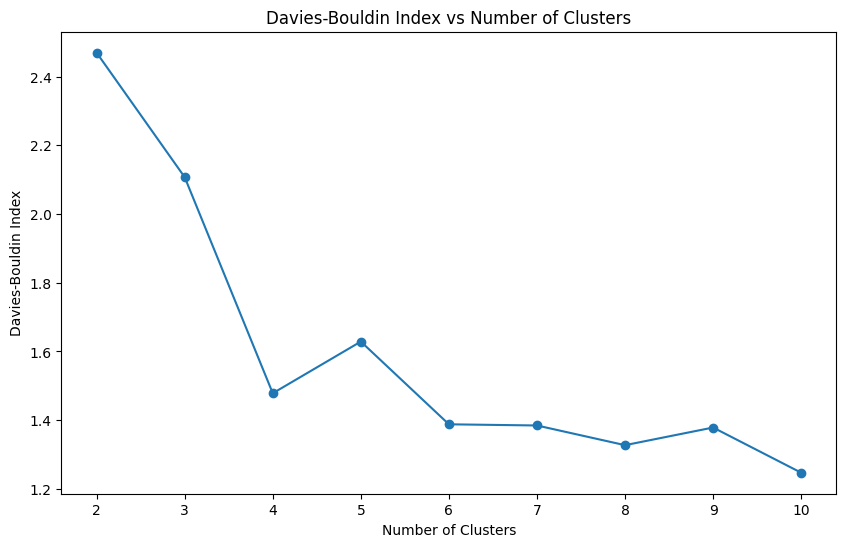

Optimal number of clusters: 10


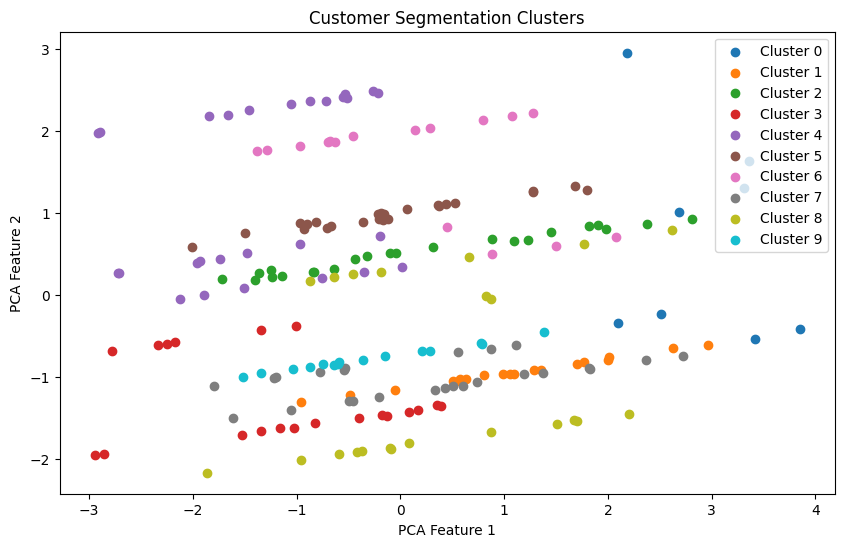

Customer segmentation results saved as Customer_Clusters.csv
Final Davies-Bouldin Index for 10 clusters: 1.2469147745508051


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# TASK 03 : Customer Segmentation and Clustering Script

# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Step 1: Setting the folder path
folder_path = "/content/drive/MyDrive/ZeotapIntern"

# Loading the datasets
customers_df = pd.read_csv(os.path.join(folder_path, 'Customers.csv'))
products_df = pd.read_csv(os.path.join(folder_path, 'Products.csv'))
transactions_df = pd.read_csv(os.path.join(folder_path, 'Transactions.csv'))

# Step 2: Preparing and merging datasets
# Merging Transactions and Customers datasets
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

# Merging with Products dataset
final_df = pd.merge(merged_df, products_df, on='ProductID', how='inner')

# Step 3: Feature engineering
# Aggregation of features by CustomerID
features_df = final_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': lambda x: x.mode()[0],
    'Category': lambda x: x.mode()[0],
}).reset_index()

# Encoding categorical variables using one-hot encoding
features_df = pd.get_dummies(features_df, columns=['Region', 'Category'])

# Normalizing features for clustering
scaler = StandardScaler()
feature_columns = features_df.columns[1:]
features_scaled = scaler.fit_transform(features_df[feature_columns])

# Step 4: Identifying the optimal number of clusters
# Evaluation of clusters using Davies-Bouldin Index
cluster_range = range(2, 11)
db_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    db_index = davies_bouldin_score(features_scaled, cluster_labels)
    db_scores.append(db_index)

# Plotting the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Choosing the optimal number of clusters
optimal_k = cluster_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Step 5: Applying K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans.fit_predict(features_scaled)

# Addition of the cluster labels to the DataFrame
features_df['Cluster'] = final_labels

# Step 6: Visualizing the clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = pca_features[features_df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

# Step 7: Saving the clustering results
features_df[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)
print("Customer segmentation results saved as Customer_Clusters.csv")

# Step 8: Output of clustering quality metric
print(f"Final Davies-Bouldin Index for {optimal_k} clusters: {np.min(db_scores)}")

# Step 9: Downloading the results
from google.colab import files
files.download('Customer_Clusters.csv')

In [11]:
import pandas as pd
import numpy as np

# Reading the CSV file
df = pd.read_csv('Customer_Clusters.csv')

# Counting customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

print("Cluster Distribution:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers ({count/len(df)*100:.2f}%)")

customer_ids = sorted(df['CustomerID'].unique())
print("First CustomerID:", customer_ids[0])
print("Last CustomerID:", customer_ids[-1])
print("Total unique CustomerIDs:", len(customer_ids))

# Checking if all expected IDs are present
expected_ids = [f'C{str(i).zfill(4)}' for i in range(1, 201)]
missing_ids = set(expected_ids) - set(customer_ids)
print("\nMissing CustomerIDs:", missing_ids)

print("\nKey Statistical Insights:")
print(f"Total Customers: {total_customers}")
print(f"Number of Clusters: {len(cluster_counts)}")
print(f"Most Populous Cluster: Cluster {cluster_counts.idxmax()} with {cluster_counts.max()} customers")
print(f"Least Populous Cluster: Cluster {cluster_counts.idxmin()} with {cluster_counts.min()} customers")

Cluster Distribution:
Cluster 0: 8 customers (4.02%)
Cluster 1: 19 customers (9.55%)
Cluster 2: 23 customers (11.56%)
Cluster 3: 20 customers (10.05%)
Cluster 4: 27 customers (13.57%)
Cluster 5: 24 customers (12.06%)
Cluster 6: 16 customers (8.04%)
Cluster 7: 25 customers (12.56%)
Cluster 8: 22 customers (11.06%)
Cluster 9: 15 customers (7.54%)
First CustomerID: C0001
Last CustomerID: C0200
Total unique CustomerIDs: 199

Missing CustomerIDs: {'C0180'}

Key Statistical Insights:
Total Customers: 199
Number of Clusters: 10
Most Populous Cluster: Cluster 4 with 27 customers
Least Populous Cluster: Cluster 0 with 8 customers
